# 1. Carga de librerías necesarias para implementación

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 30) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 



# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 


# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# Importar/ Exportar modelos
from joblib import dump, load
# Regresion lineal
from sklearn.linear_model import LinearRegression



# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# 2. Cargar los datos

In [ ]:
# Se cargan los datos. 
df=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8', index_col=0)

Se cargan los datos más recientes

In [ ]:
df_recent = pd.read_csv('202210_Laboratorio3_data_datos_recientes.csv')
print(df_recent.shape)
df_recent.head(5)

(294, 19)


,Unnamed: 0,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2644,151.0,0,1.80,423.295351,9.0,0,68.6,0,91.0,4.87,9.0,0.1,2284.378580,146.0,0.1,0.1,0.693,14.6
1,2645,153.0,0,1.79,45.851058,85.0,0,67.8,0,91.0,5.90,9.0,0.1,229.714718,99789.0,0.1,0.1,0.683,13.7
2,2646,155.0,0,1.51,310.820338,88.0,0,67.0,0,85.0,5.30,84.0,0.1,1842.444210,99184.0,0.1,0.1,0.679,13.5
3,2647,157.0,0,1.35,330.100739,91.0,4,66.2,0,91.0,5.66,89.0,0.1,1837.977391,98611.0,0.1,0.1,0.674,13.2
4,2648,158.0,0,1.24,40.491289,93.0,0,65.5,0,91.0,4.75,91.0,0.1,263.272360,9882.0,0.1,0.1,0.676,13.7


# 3. Perfilamiento y entendimiento de los datos 

In [ ]:
df.shape

(2644, 19)

Se tienen 2644 filas y 19 variables

In [ ]:
df_recent.shape

(294, 19)

In [ ]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2643
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2644 non-null   float64
 1   Adult Mortality                  2644 non-null   float64
 2   infant deaths                    2644 non-null   int64  
 3   Alcohol                          2644 non-null   float64
 4   percentage expenditure           2644 non-null   float64
 5   Hepatitis B                      2644 non-null   float64
 6   Measles                          2644 non-null   int64  
 7   BMI                              2644 non-null   float64
 8   under-five deaths                2644 non-null   int64  
 9   Polio                            2644 non-null   float64
 10  Total expenditure                2644 non-null   float64
 11  Diphtheria                       2644 non-null   float64
 12  HIV/AIDS            

Se puede ver que todas las variables son de tipo numéricas

In [ ]:
# Se observan las ausencias. 
df.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

No hay ausencias en los datos

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


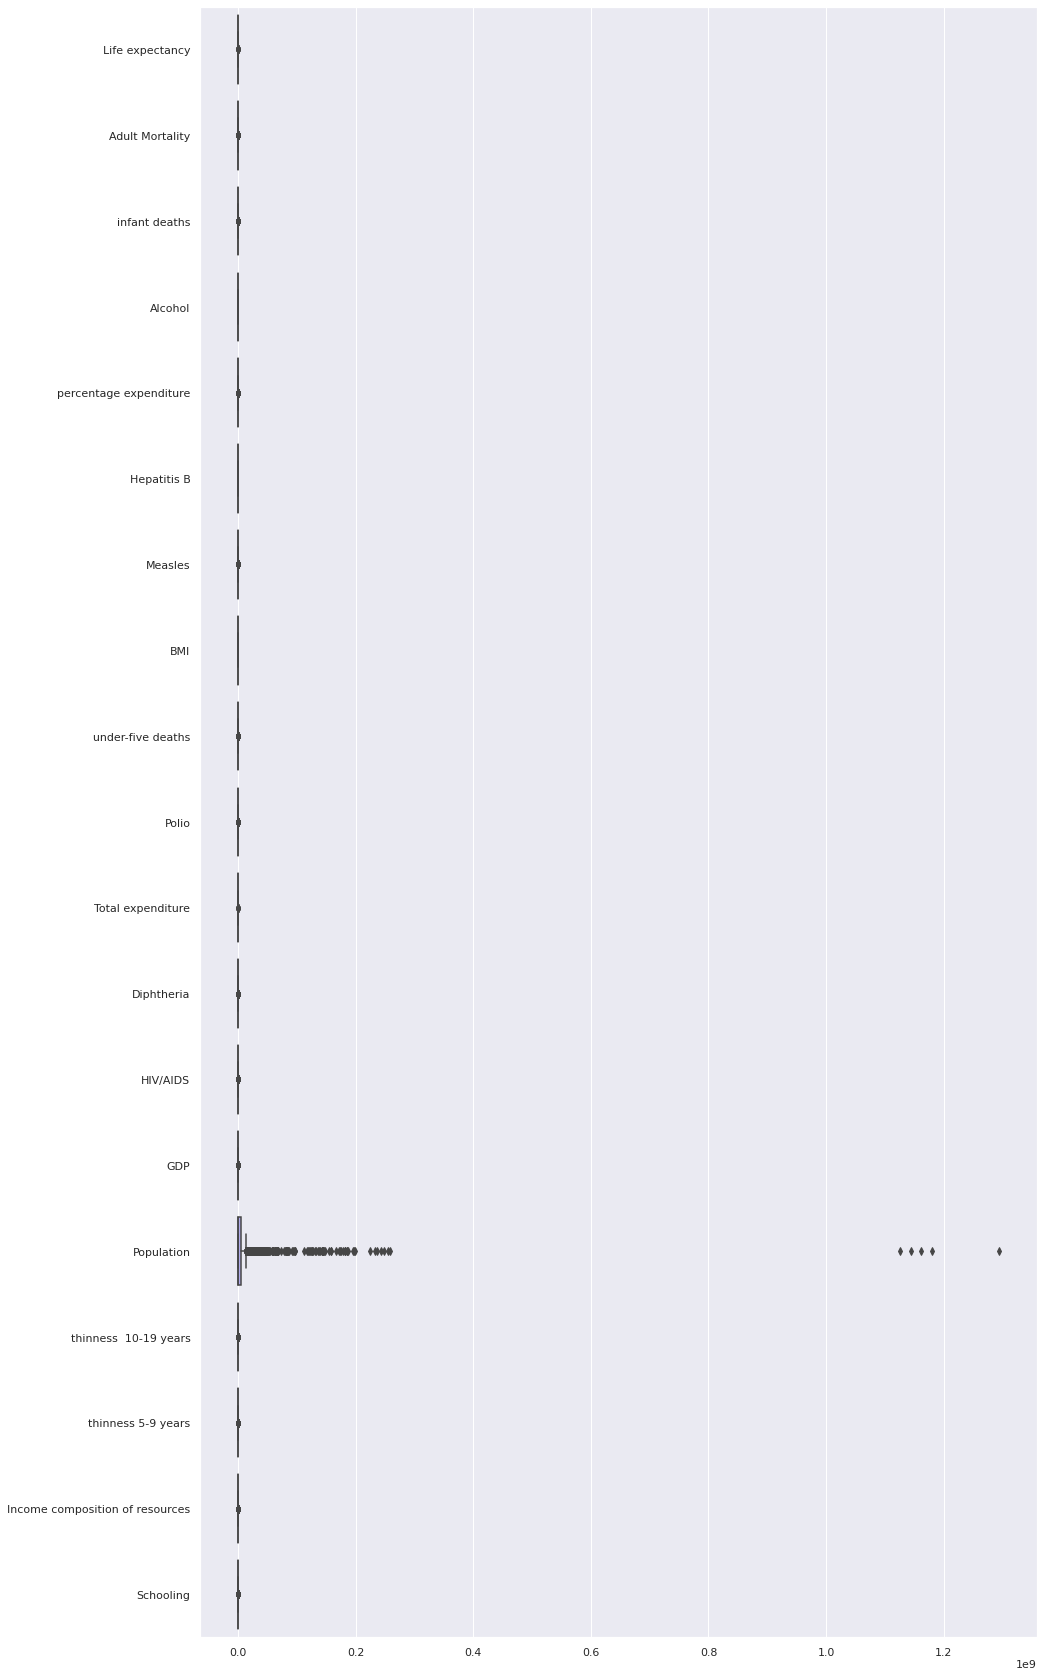

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(15,30))
ax = sns.boxplot(data=df, orient="h")

Los datos presentan dominios muy diferentes, por lo que se considera buena idea normalizar.

### Revisaremos los valores que tiene cada columna

In [ ]:
#Se visualizan todos los valores
atributo = "Life expectancy"
df[atributo].value_counts().to_frame()

,Life expectancy
73.0,44
75.0,30
78.0,26
73.6,24
81.0,23
...,...
45.1,1
44.0,1
43.5,1
43.1,1


In [ ]:
atributo = "BMI"
df[atributo].value_counts().to_frame()

,BMI
0.0,34
58.5,16
54.2,15
59.9,14
57.0,14
...,...
77.6,1
42.5,1
64.6,1
11.8,1


In [ ]:
#Revisar los valores de todas las columnas
# Lista de nombres de columnas
lista = df.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Life expectancy
0.0      9
36.3     1
39.0     1
41.0     1
41.5     1
        ..
85.0    12
86.0    13
87.0     8
88.0    10
89.0    11
Length: 359, dtype: int64
--------------------
Adult Mortality
0.0       9
1.0      11
2.0       8
3.0       6
4.0       4
         ..
675.0     1
679.0     1
682.0     1
693.0     1
699.0     1
Length: 409, dtype: int64
--------------------
infant deaths
0       803
1       317
2       203
3       157
4        79
       ... 
1400      1
1500      2
1600      1
1700      2
1800      2
Length: 197, dtype: int64
--------------------
Alcohol
0.00     177
0.01     275
0.02      12
0.03      14
0.04       6
        ... 
16.35      1
16.58      1
16.99      1
17.31      1
17.87      1
Length: 1032, dtype: int64
--------------------
percentage expenditure
0.000000        498
0.099872          1
0.108056          1
0.275648          1
0.328418          1
               ... 
18379.329740      1
18822.867320      1
18961.348600      1
19099.045060      1
19479.

Se procede a la limpieza

In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l = df

### **Análisis** 


1. No hay variables con varios valores nulos, pero sí varias con valores atípicos fuera de rango como:
  
*   Life expectancy,  Population, tienen valores en 0 que no tienen sentido en la realidad. 

*   BMI, tiene valores muy pequeños y muy grandes que no tienen sentido. Se dejarán solo aquellos en el rango [14, 55]

*  infant deaths, under-five deaths tienen valores mayores a 1000, y dado que se trata de la cantidad de casos por cada 1000 habitantes, no tiene sentido que haya valores mayores


*  Measles, tiene valores mayores a 1000, y dado que se trata de la cantidad de casos por cada 1000 habitantes, no tiene sentido que haya valores mayores.  Pero debido a la gran cantidad de estos, se decide eliminar la columna de la tabla.



Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

# 4. Regresión

In [ ]:
datos_t=datos_l.copy()

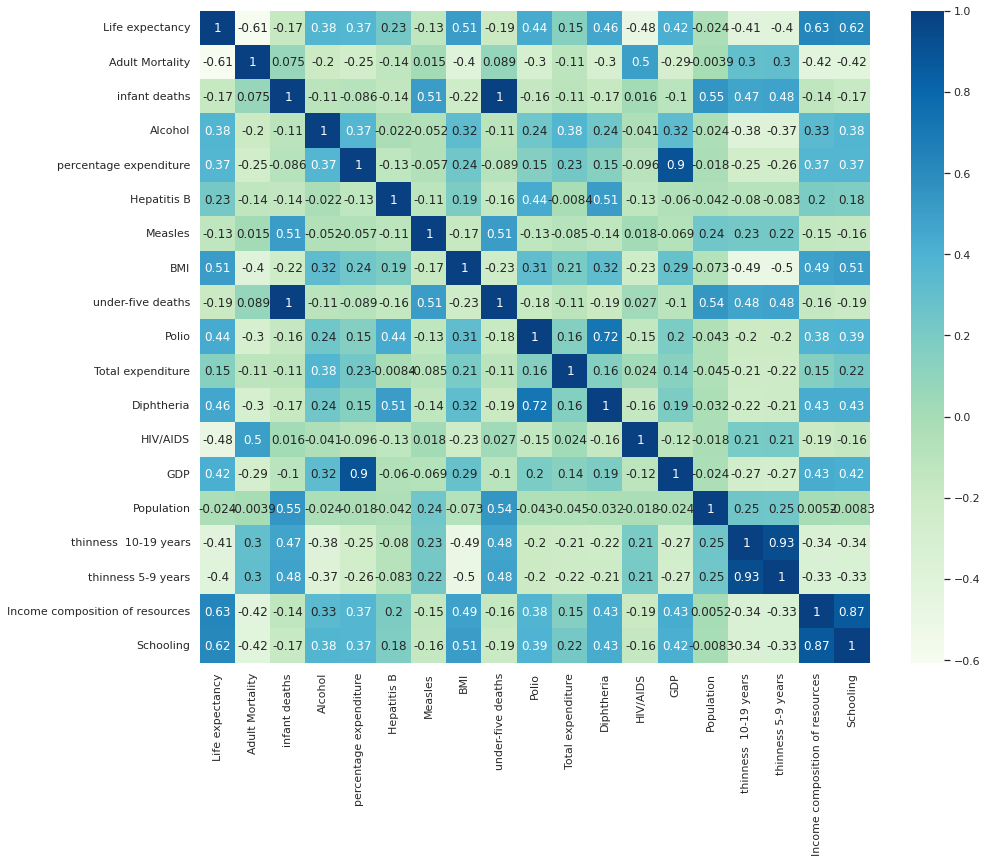

In [ ]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,12))
correlacion = datos_t.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

De la grafica anterior vemos que unos buenos candidatos son:

BMI
Income composition of resources
Schooling
Adult Mortality
HIV/AIDS

Esto debido a la alta correlación que tienen con la variable objetivo.



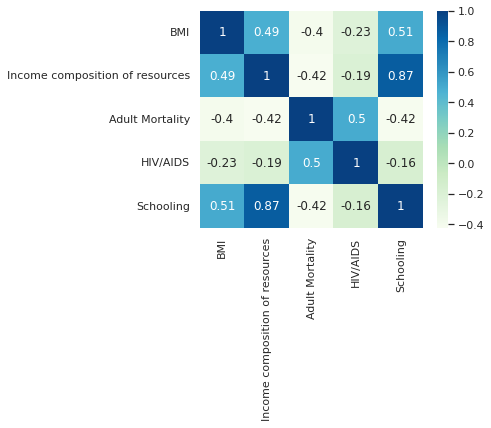

In [ ]:
selected_cols = ['BMI','Income composition of resources','Adult Mortality', 'HIV/AIDS', 'Schooling']

df_temp = datos_t[selected_cols]
f = plt.figure(figsize=(5, 4))
sns.heatmap(df_temp.corr(), cmap = 'GnBu', annot = True)

Sin embargo, en el laboratorio anterior se observó  que existía una alta colinealidad entre Income composition of resources y Schooling, se decidió usar solo una de estas: income que tiene mayor correlación con la objetivo y se cumple con el supuesto de colinealidad de las regresiones.

#### SEGUNDO MEJOR

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, string, unicodedata

import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import TransformerMixin
# Importar/ Exportar modelos
from joblib import dump, load

In [ ]:
datos_l=pd.read_csv('drive/MyDrive/clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')

datos_l = datos_l.drop(['label'],axis=1)
datos_l

,study_and_condition
0,study interventions are Saracatinib . recurren...
1,study interventions are Stem cell transplantat...
2,study interventions are Lenograstim . recurren...
3,study interventions are Doxorubicin . stage ii...
4,study interventions are Poly I-C . prostate ca...
...,...
11995,study interventions are Prednisolone hemisucci...
11996,study interventions are Bevacizumab . recurren...
11997,"study interventions are Antibodies, Monoclonal..."
11998,study interventions are Vorinostat . colorecta...


In [ ]:
filename = 'prueba.csv'
datos_l.to_csv(filename)

In [ ]:
nombrearchivo= 'pipelineRL3.joblib'

In [ ]:
# Se lee
pipe = load(nombrearchivo)
pipe


AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preprocesamiento
# Seleccionar unicamente las columnas que se quieren usar
selected_cols = ['BMI','Income composition of resources','Adult Mortality', 'HIV/AIDS']

# Creating our pipeline that first preprocesses the data, then scales the data, then fits the data to a lineal regresion
lr_pipeline2= Pipeline(steps = [
    ('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])), # Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),#Reemplazar valores nulos por la media

    #Acá debería ir la transformación personalizada
    
    ('data_scaling', MinMaxScaler()), #scales the data
    ('model', LinearRegression())
  ])

# Extracción de las variables explicativas y objetivo para entrenar
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

lr_pipeline2 = lr_pipeline2.fit(X,y)

print("R cuadrado:",f"{lr_pipeline2.score(X,y)}")
y_true = y
y_predicted = lr_pipeline2.predict(X)
rmse_lr2=np.sqrt(mse(y_true, y_predicted))
print("RMSE:",rmse_lr2)

R cuadrado: 0.6043871795105944
RMSE: 6.509792034049856


#### **MEJOR**
Este fue el pipeline que finalmente se usó

In [ ]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['BMI','Income composition of resources','Adult Mortality', 'HIV/AIDS']

# Creating our pipeline that first preprocesses the data, then scales the data, use polinomial feature, then fits the data to a lineal regresion
lr_pipeline= Pipeline(steps = [
    ('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),  # Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),#Reemplazar valores nulos por la media

    #Acá debería ir la transformación personalizada
    
    ('data_scaling', MinMaxScaler()), #scales the data

    #Se usó la función PolynomialFeatures que genera una nueva matriz de características que consiste en todas las  
    #combinaciones de polinomios de las características con un grado menor o igual que el grado especificado. 
    ('polinomial_feature', PolynomialFeatures(5)),
    ('model', LinearRegression())
  ])

# Extracción de las variables explicativas y objetivo para entrenar
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

lr_pipeline = lr_pipeline.fit(X,y)

print("R cuadrado:",f"{lr_pipeline.score(X,y)}")
y_true = y
y_predicted = lr_pipeline.predict(X)
rmse_lr=np.sqrt(mse(y_true, y_predicted))
print("RMSE:",rmse_lr)

R cuadrado: 0.8911777009295805
RMSE: 3.4142151444749054


## Evaluación cuantitativa

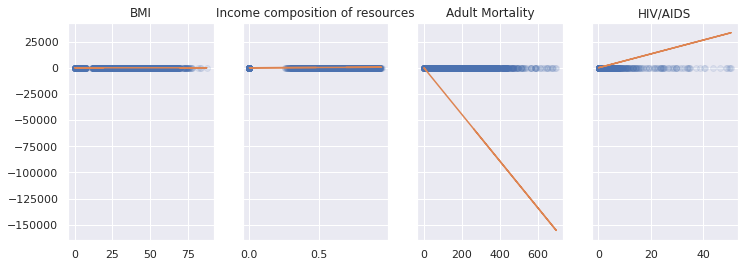

In [ ]:
# Visualizar la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = lr_pipeline['model'].coef_[pos_col]
    # Interceto
    b = lr_pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

Resultados de las métricas para cada caso implementado

In [ ]:
print("lr_cuadrado:",f"{lr_pipeline.score(X,y)}","RMSE:", rmse_lr)
print("lr2_cuadrado:",f"{lr_pipeline2.score(X,y)}","RMSE:", rmse_lr2)

lr_cuadrado: 0.8911777009295805 RMSE: 3.4142151444749054
lr2_cuadrado: 0.6043871795105944 RMSE: 6.509792034049856


Se puede notar que el mejor modelo es el lr_pipeline, pues tiene mayor R cuadrado, y menor RMSE.

Esto quiere decir que aproximadamente el 89.2% de la variación de la variable Y es explicada por el modelo.
Además, el error cuadrático medio es de aproximadamente 3.42, es decir, tenemos un error de esta magnitud ya sea encima o por debajo del resultado que damos.

**¿Su equipo recomienda instalar el modelo de estimación en producción o es mejor continuar usando expertos para la tarea?**
En términos generales, sí. De acuerdo a las métricas, se tiene un porcentaje acpetable para el R cuadrado y el RMSE no es tan alto (aunque estas métricas podrían ser mejores). Sin embargo, también depende del nivel de precisión que el negocio desee.Si desea tener una mejor precisión, entonces es recomedable que busque otras alternativas. 

## Evaluación cualitativa

### Validación de supuestos

#### Colinealiedad

Como se notó  que existía una alta colinealidad entre Income composition of resources y Schooling, se decidió usar solo una de estas: income que tiene mayor correlación con la objetivo.

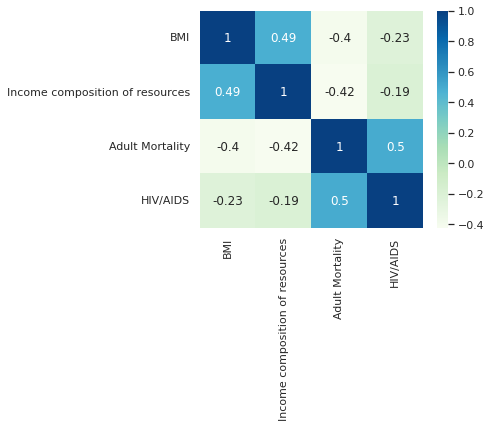

In [ ]:
df_temp = datos_t[selected_cols]
f = plt.figure(figsize=(5, 4))
sns.heatmap(df_temp.corr(), cmap = 'GnBu', annot = True)

#### Linealidad

Visualmente, la relación entre cada variable explicativa y la varable objetivo es lineal

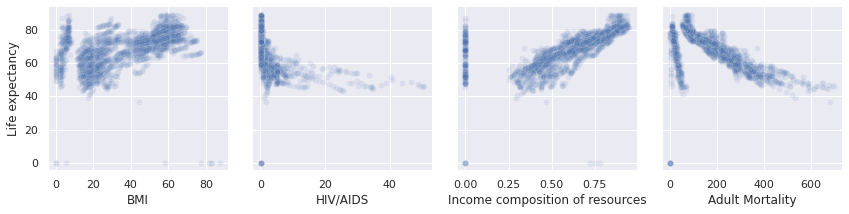

In [ ]:
sns.pairplot(datos_t, height=3, aspect = 1, y_vars = 'Life expectancy', x_vars = ['BMI', 'HIV/AIDS','Income composition of resources','Adult Mortality'], kind='scatter', plot_kws = {'alpha':0.1})

#### Varianza Constante (Homocedasticidad)

Para este supuesto se usó la función PolynomialFeatures que genera una nueva matriz de características que consiste en todas las combinaciones de polinomios de las características con un grado menor o igual que el grado especificado. Así se obtuvo el mejor estimador

### Interpretación de coeficientes

Ver los coeficientes del mejor modelo.

In [ ]:
lr_pipeline['model'].coef_

array([ 1.60556316e-08,  5.38663085e+02, -2.22306642e+02,  6.61376365e+02,
       -4.55194840e+01, -1.67131842e+03, -1.39259923e+03, -3.75184239e+03,
       -2.88604166e+03,  1.72590105e+03, -1.56109957e+03,  7.58651630e+02,
       -2.66231602e+03,  5.69610904e+02,  5.64736695e+02,  2.59885838e+03,
        2.86804987e+03,  7.02827596e+03, -2.53681112e+03,  1.48202868e+03,
        4.88203300e+03,  1.10353521e+04,  8.43388572e+03,  6.00856772e+03,
        2.18689371e+03, -3.64769700e+03,  1.61839552e+03, -2.85392270e+03,
        7.27830665e+03, -8.68047962e+03,  2.21044236e+03,  4.48151321e+03,
       -9.29035993e+01, -5.82662905e+03,  8.47740571e+02, -2.05981668e+03,
       -5.58354700e+02, -5.95973142e+03,  7.72775640e+03, -4.58639326e+03,
       -8.08156778e+03, -5.42656837e+02, -8.30009174e+03, -6.80889190e+03,
        3.18639778e+04,  3.70443366e+02, -9.47587818e+02, -8.90398951e+03,
       -6.48728143e+03, -1.56323092e+04, -2.89028307e+04, -6.03057556e+03,
       -9.13142202e+03,  

Debido a que después de utilizar  PolynomialFeatures para obtener el mejor modelo, se obtienen coeficientes más difíciles de interpretar, se va usar el resultado del segundo mejor modelo.

In [ ]:
importancia = lr_pipeline2['model'].coef_
importancia_atributo = pd.DataFrame(data={"Atributo": selected_cols,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Income composition of resources,16.085826
1,BMI,7.321276
2,Adult Mortality,-15.095844
3,HIV/AIDS,-25.636430


Se puede observar que la columna *Income composition of resources* es la que mayor influencia tiene sobre  *Life expectancy*, seguida por el *BMI*, *Adult Mortality*, y el *HIV/AIDS*.

#### Normalidad en los errores

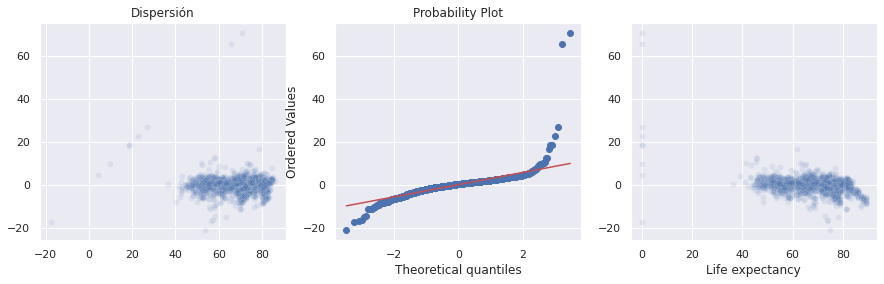

In [ ]:
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

# Calculamos los errores
errors = (lr_pipeline.predict(X) - y).values

fig, axes = plt.subplots(1, 3, figsize = (15,4))

# Dispersión
d=sns.scatterplot(x = lr_pipeline.predict(X), y = errors, alpha = 0.1, ax = axes[0])
d.set_title("Dispersión")

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

# Visualizamos nuestros datos
# Calculamos los errores
errors = (lr_pipeline.predict(X) - y).values
sns.scatterplot(data  = datos_t, x = 'Life expectancy', y = errors, alpha = 0.1, ax = axes[2])

# 5. Final y exportar

### Se usa el mejor estimador: **lr_pipeline**

(0.0, 85.0)

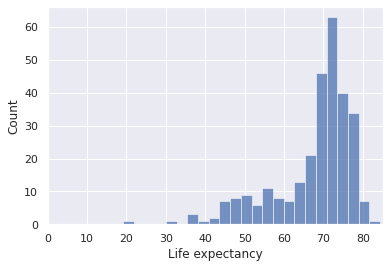

In [ ]:
#Usamos el último estimador (el mejor) para clasificar los datos recientes

df_recent['Life expectancy'] = lr_pipeline.predict(df_recent)
sns.histplot(df_recent['Life expectancy'])
plt.xlim(0,85)

In [ ]:
#Exportamos el estmador final
# Usamos la lbreria joblib
filename = 'lr_pipeline.joblib'
# Se guarda
dump(lr_pipeline, filename)

['lr_pipeline.joblib']